In [2]:
import pandas as pd
songs = pd.read_excel('Profanity_and_Polarity.xlsx')

In [9]:
import lyricsgenius
import requests
genius_client_id = "wZZ2RWc5mqp-5Pbz2W1rQJWE8LQ3pFBrb1Hw5_AOqgybq28mt7kjdjcG4zktCNbO"
genius_client_secret = "PefqBJHor_muDgTutGlaXXaxmzsI7TQCps9FQ3FwkUTT0WJIT3s0A5YA9mnFbfp_-CBhQF7b0omgE8kaM3dJ3w"
genius_access_token = "NUHHVpwnmbDYUYw8Padu0gQeHvYN4OsKYtE2MKNUpBUI6yR-xZXKY6S5NvCnFbiP"


genius = lyricsgenius.Genius("genius_access_token")

def get_lyrics(song_title, artist_name):
    try:
        song = genius.search_song(song_title, artist_name)
        if song:
            return song.lyrics
    except requests.exceptions.Timeout as e:
        # Handle timeout exceptions here
        print(f"Request timed out: {e}")
    except requests.exceptions.HTTPError as e:
        # Handle HTTP errors here
        print(f"HTTP error occurred: {e}")
    except requests.exceptions.ConnectionError as e:
        # Handle connection errors here
        print(f"Connection error occurred: {e}")
    except requests.exceptions.RequestException as e:
        # Handle any other request exceptions here
        print(f"An error occurred during the request: {e}")
    return None

# Example usage
lyrics = get_lyrics("Kim", "Eminem")
print(lyrics)

Searching for "Kim" by Eminem...
Done.
300 ContributorsTranslationsРусскийItalianoKim Lyrics[Intro: Eminem & Kim]
Aw, look at daddy's baby girl
That's daddy's baby, little sleepy head
Yesterday I changed your diaper
Wiped you and powdered you
How did you get so big?
Can't believe it, now you're two
Baby, you're so precious, daddy's so proud of you
Sit down, bitch! You move again, I'll beat the shit out of you! (Okay!)
[Verse 1: Eminem & Kim]
Don't make me wake this baby!
She don't need to see what I'm 'bout to do!
Quit crying, bitch! Why do you always make me shout at you?!
How could you just leave me and love him out the blue?!
Oh, what's the matter, Kim? Am I too loud for you?
Too bad, bitch! You're gonna finally hear me out this time!
At first I'm like, "Aight, you wanna throw me out? That's fine!"
But not for him to take my place, are you out your mind?!
This couch, this TV, this whole house is mine!
How could you let him sleep in our bed?! Look it, Kim!
Look at your husband now! (

['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']
[0.06603405672033123, 0.062302294655235846, 0.0, 0.004471182412358883, 0.014931999735921306, 0.058595761536938004, 0.11304784540078656, 0.07989488724782844, 0.05762149977836253, 0.04386017033075856]


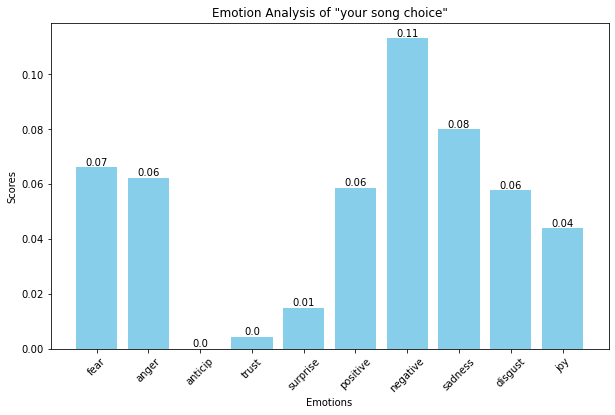

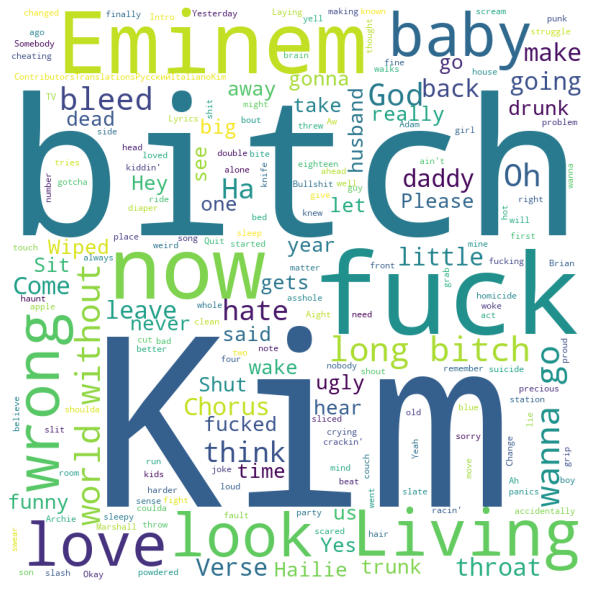

In [10]:
# Import required libraries
import matplotlib.pyplot as plt
from nrclex import NRCLex
from wordcloud import WordCloud, STOPWORDS


# Splitting the lyrics into lines for emotion analysis
lines = lyrics.split('\n')

# Emotion Analysis using NRCLex
emotion_scores = { 'fear': 0, 'anger': 0, 'anticip': 0, 'trust': 0, 'surprise': 0, 'positive': 0, 'negative': 0, 'sadness': 0, 'disgust': 0, 'joy': 0 }

for line in lines:
    if line.strip():  # Check if the line is not empty
        text_object = NRCLex(line)
        for emotion in emotion_scores.keys():
            emotion_scores[emotion] += text_object.affect_frequencies.get(emotion, 0)

# Normalizing the scores
total_lines = len([line for line in lines if line.strip()])
for emotion in emotion_scores:
    emotion_scores[emotion] /= total_lines

# Visualization - Bar Chart
emotions = list(emotion_scores.keys())
scores = list(emotion_scores.values())
print(emotions)
print(scores)

plt.figure(figsize=(10, 6))
bars = plt.bar(emotions, scores, color='skyblue')

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Emotions')
plt.ylabel('Scores')
plt.title('Emotion Analysis of "your song choice"')
plt.xticks(rotation=45)
plt.show()

# Word Cloud Generation
# Define a set of words to exclude (common and explicit words)
explicit_stopwords = {'explicit1', 'explicit2', 'explicit3'}  # Replace with actual explicit words
stopwords = set(STOPWORDS).union(explicit_stopwords)

wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      stopwords=stopwords, 
                      min_font_size=10).generate(lyrics)

# Displaying the Word Cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0)
plt.show()

In [16]:
import matplotlib.pyplot as plt
from nrclex import NRCLex
from wordcloud import WordCloud, STOPWORDS

# Emotion Analysis using NRCLex
emotion_scores = { 'fear': 0, 'anger': 0, 'anticip': 0, 'trust': 0, 'surprise': 0, 'positive': 0, 'negative': 0, 'sadness': 0, 'disgust': 0, 'joy': 0 }

def get_emotions(lyrics):
    # Splitting the lyrics into lines for emotion analysis
    lines = lyrics.split('\n')
    for line in lines:
        if line.strip():  # Check if the line is not empty
            text_object = NRCLex(line)
            for emotion in emotion_scores.keys():
                emotion_scores[emotion] += text_object.affect_frequencies.get(emotion, 0)

    # Normalizing the scores
    total_lines = len([line for line in lines if line.strip()])
    for emotion in emotion_scores:
        emotion_scores[emotion] /= total_lines

    # Extracting the top emotion
    

    top_emotions = sorted(emotion_scores.items(), key=lambda item: item[1], reverse=True)[:2]
    top_emotion_1, top_emotion_2 = top_emotions
    return top_emotions
    

    #print(f"Top emotion: {top_emotion} with a score of {top_emotion_score}")

# Example lyrics for demonstration; replace 'lyrics' with your actual lyrics variable

get_emotions(lyrics)

[('negative', 0.11304784540078656), ('sadness', 0.07989488724782844)]

In [8]:
columns_to_drop = [col for col in songs.columns if 'Unnamed' in col]
songs.drop(columns=columns_to_drop, inplace=True)
songs

,track_name,artist_name,lyrics,profanity_densv,top_profanity_cat,polarity,subjectivity
0,Diptick,William Fields,\nalarmed for the condition in which the kingd...,0.000166,other / general insult,0.147,0.514
1,Street Lights,Kanye West,let me know\ndo i still got time to grow\nthin...,0.000000,NaN,-0.350,0.900
2,Kato,The Aubreys,older i know but can i still be bathed by you\...,0.007576,sexual anatomy / sexual acts,-0.072,0.553
3,HELP ME (with Dead Sara),Demi Lovato,adrianne lenker dragon eyes\ndan bull squadr...,0.001706,sexual anatomy / sexual acts,0.067,0.502
4,Wanna B Ur Lovr,"""Weird Al"" Yankovic",but do you mind if i check you out\ni like you...,0.000000,NaN,0.233,0.639
...,...,...,...,...,...,...,...
288248,Here Comes Sweet Death,Midnight,theyre of no use at all\nswallow your wine bit...,0.000000,NaN,0.308,0.692
288249,Anesthetic Vapors,Goatpenis,NaN,NaN,NaN,NaN,NaN
288250,A Human Touch,Jackson Browne,you can call it a decision\ni say its how were...,0.000000,NaN,0.212,0.454
288251,Stubborn,My Fictions,NaN,NaN,NaN,NaN,NaN


In [21]:
songs['emotion1_score'] = None
songs['emotion2_score'] = None
test_10_rows['emotion1_score'] = None
test_10_rows['emotion2_score'] = None

C:\Users\JUJU\AppData\Local\Temp/ipykernel_5268/2511925437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_10_rows['emotion1_score'] = None
C:\Users\JUJU\AppData\Local\Temp/ipykernel_5268/2511925437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_10_rows['emotion2_score'] = None


In [17]:
test_10_rows=songs[:10]
test_10_rows

,track_name,artist_name,lyrics,profanity_densv,top_profanity_cat,polarity,subjectivity
0,Diptick,William Fields,\nalarmed for the condition in which the kingd...,0.000166,other / general insult,0.147,0.514
1,Street Lights,Kanye West,let me know\ndo i still got time to grow\nthin...,0.000000,NaN,-0.350,0.900
2,Kato,The Aubreys,older i know but can i still be bathed by you\...,0.007576,sexual anatomy / sexual acts,-0.072,0.553
3,HELP ME (with Dead Sara),Demi Lovato,adrianne lenker dragon eyes\ndan bull squadr...,0.001706,sexual anatomy / sexual acts,0.067,0.502
4,Wanna B Ur Lovr,"""Weird Al"" Yankovic",but do you mind if i check you out\ni like you...,0.000000,NaN,0.233,0.639
5,WHERE MAN KNOWS WANT,The Armed,i cant fall asleep\na jukebox that only has on...,0.000000,NaN,0.141,0.372
6,Bongoloid,Goto80,NaN,NaN,NaN,NaN,NaN
7,On Key - Audio Remix,Limewax,one two one two\n\nadam bainbridge\thello hi\n...,0.003273,bodily fluids / excrement,0.111,0.483
8,"Chop Chop, Goodbye",I Wrote Haikus About Cannibalism in Your Yearbook,NaN,NaN,NaN,NaN,NaN
9,What We Need More of Is Science,MC Hawking,im a disciple of science\ni know the universe ...,0.023179,bodily fluids / excrement,-0.025,0.543


In [20]:
test_10_rows

,track_name,artist_name,lyrics,profanity_densv,top_profanity_cat,polarity,subjectivity,emotion1,emotion2
0,Diptick,William Fields,\nalarmed for the condition in which the kingd...,0.000166,other / general insult,0.147,0.514,None,None
1,Street Lights,Kanye West,let me know\ndo i still got time to grow\nthin...,0.000000,NaN,-0.350,0.900,None,None
2,Kato,The Aubreys,older i know but can i still be bathed by you\...,0.007576,sexual anatomy / sexual acts,-0.072,0.553,None,None
3,HELP ME (with Dead Sara),Demi Lovato,adrianne lenker dragon eyes\ndan bull squadr...,0.001706,sexual anatomy / sexual acts,0.067,0.502,None,None
4,Wanna B Ur Lovr,"""Weird Al"" Yankovic",but do you mind if i check you out\ni like you...,0.000000,NaN,0.233,0.639,None,None
5,WHERE MAN KNOWS WANT,The Armed,i cant fall asleep\na jukebox that only has on...,0.000000,NaN,0.141,0.372,None,None
6,Bongoloid,Goto80,NaN,NaN,NaN,NaN,NaN,None,None
7,On Key - Audio Remix,Limewax,one two one two\n\nadam bainbridge\thello hi\n...,0.003273,bodily fluids / excrement,0.111,0.483,None,None
8,"Chop Chop, Goodbye",I Wrote Haikus About Cannibalism in Your Yearbook,NaN,NaN,NaN,NaN,NaN,None,None
9,What We Need More of Is Science,MC Hawking,im a disciple of science\ni know the universe ...,0.023179,bodily fluids / excrement,-0.025,0.543,None,None


In [24]:
# [('negative', 0.11304784540078656), ('sadness', 0.07989488724782844)]
df = songs
for index,row in df.iterrows():
    if row['emotion1'] != None and row['emotion2'] != None:
        continue
    lyrics = row['lyrics']
    top_2_emotions = get_emotions(str(lyrics))
    df.at[index, 'emotion1'] = top_2_emotions[0][0]
    df.at[index, 'emotion1_score'] = top_2_emotions[0][1]
    df.at[index, 'emotion2'] = top_2_emotions[1][0]
    df.at[index, 'emotion2_score'] = top_2_emotions[1][1]
df
    

,track_name,artist_name,lyrics,profanity_densv,top_profanity_cat,polarity,subjectivity,emotion1,emotion2,emotion1_score,emotion2_score
0,Diptick,William Fields,\nalarmed for the condition in which the kingd...,0.000166,other / general insult,0.147,0.514,positive,trust,0.215888,0.151892
1,Street Lights,Kanye West,let me know\ndo i still got time to grow\nthin...,0.000000,NaN,-0.350,0.900,positive,joy,0.29052,0.029906
2,Kato,The Aubreys,older i know but can i still be bathed by you\...,0.007576,sexual anatomy / sexual acts,-0.072,0.553,sadness,fear,0.140044,0.116308
3,HELP ME (with Dead Sara),Demi Lovato,adrianne lenker dragon eyes\ndan bull squadr...,0.001706,sexual anatomy / sexual acts,0.067,0.502,positive,negative,0.11677,0.091566
4,Wanna B Ur Lovr,"""Weird Al"" Yankovic",but do you mind if i check you out\ni like you...,0.000000,NaN,0.233,0.639,positive,negative,0.143331,0.121332
...,...,...,...,...,...,...,...,...,...,...,...
288248,Here Comes Sweet Death,Midnight,theyre of no use at all\nswallow your wine bit...,0.000000,NaN,0.308,0.692,negative,fear,0.151405,0.144537
288249,Anesthetic Vapors,Goatpenis,NaN,NaN,NaN,NaN,NaN,negative,fear,0.151405,0.144537
288250,A Human Touch,Jackson Browne,you can call it a decision\ni say its how were...,0.000000,NaN,0.212,0.454,positive,joy,0.052978,0.052946
288251,Stubborn,My Fictions,NaN,NaN,NaN,NaN,NaN,positive,joy,0.052978,0.052946


In [25]:
df.to_excel('Profanity_Polarity_Emotion.xlsx')

In [26]:
df

,track_name,artist_name,lyrics,profanity_densv,top_profanity_cat,polarity,subjectivity,emotion1,emotion2,emotion1_score,emotion2_score
0,Diptick,William Fields,\nalarmed for the condition in which the kingd...,0.000166,other / general insult,0.147,0.514,positive,trust,0.215888,0.151892
1,Street Lights,Kanye West,let me know\ndo i still got time to grow\nthin...,0.000000,NaN,-0.350,0.900,positive,joy,0.29052,0.029906
2,Kato,The Aubreys,older i know but can i still be bathed by you\...,0.007576,sexual anatomy / sexual acts,-0.072,0.553,sadness,fear,0.140044,0.116308
3,HELP ME (with Dead Sara),Demi Lovato,adrianne lenker dragon eyes\ndan bull squadr...,0.001706,sexual anatomy / sexual acts,0.067,0.502,positive,negative,0.11677,0.091566
4,Wanna B Ur Lovr,"""Weird Al"" Yankovic",but do you mind if i check you out\ni like you...,0.000000,NaN,0.233,0.639,positive,negative,0.143331,0.121332
...,...,...,...,...,...,...,...,...,...,...,...
288248,Here Comes Sweet Death,Midnight,theyre of no use at all\nswallow your wine bit...,0.000000,NaN,0.308,0.692,negative,fear,0.151405,0.144537
288249,Anesthetic Vapors,Goatpenis,NaN,NaN,NaN,NaN,NaN,negative,fear,0.151405,0.144537
288250,A Human Touch,Jackson Browne,you can call it a decision\ni say its how were...,0.000000,NaN,0.212,0.454,positive,joy,0.052978,0.052946
288251,Stubborn,My Fictions,NaN,NaN,NaN,NaN,NaN,positive,joy,0.052978,0.052946


In [28]:
value_counts = df['lyrics'].value_counts()
value_counts.head(10)

blanca  shattered \nlougotcash feat trippie redd  too turnt october terri clark  raising the bar \njess kent  girl \njoey purp  quarterthing \ncypress hill  crazy \nbrooke evers feat rachel west  glen faria  turn around \nborn dirty feat jstlbby  get up get out \nfirst aid kid  tender offerings \nkap g  no kap \nasiahn  nola \nyoung dolph  by mistake \ncharlotte lawrence  stole your car october howard  together alone \njoji  slow dancing in the dark \njoji  yeah right \nbrett young  here tonight \nswizz beatz feat lil wayne  pistol on my side poms \nlil baby  gunna  drip too hard \nciara  dose \nlana del rey  mariners apartment complex \ntori kelly  hiding place october noname  room  \nwale  free lunch \ncarrie underwood  cry pretty october naseptemberseptember naseptember naseptember gucci mane bruno mars  kodak black  wake up in the sky september naseptember naseptember naseptember teddy  body and soul \nbrynn elliott  time of our lives \nmadison cuningham  last boat to freedom \nabb

In [29]:


# Assuming df is your DataFrame and 'column_name' is the name of the column you want to analyze
# Replace 'column_name' with the actual name of your column

# Find duplicated entries in the column
duplicated_entries = df[df.duplicated(subset=['lyrics'], keep=False)]

# Count the occurrences of each duplicated entry
duplicates_frequency = duplicated_entries['lyrics'].value_counts()

# Print or use the resulting Series, which contains the duplicated entries and their frequencies
print("Duplicated entries and their frequencies:")
print(duplicates_frequency)


Duplicated entries and their frequencies:
blanca  shattered \nlougotcash feat trippie redd  too turnt october terri clark  raising the bar \njess kent  girl \njoey purp  quarterthing \ncypress hill  crazy \nbrooke evers feat rachel west  glen faria  turn around \nborn dirty feat jstlbby  get up get out \nfirst aid kid  tender offerings \nkap g  no kap \nasiahn  nola \nyoung dolph  by mistake \ncharlotte lawrence  stole your car october howard  together alone \njoji  slow dancing in the dark \njoji  yeah right \nbrett young  here tonight \nswizz beatz feat lil wayne  pistol on my side poms \nlil baby  gunna  drip too hard \nciara  dose \nlana del rey  mariners apartment complex \ntori kelly  hiding place october noname  room  \nwale  free lunch \ncarrie underwood  cry pretty october naseptemberseptember naseptember naseptember gucci mane bruno mars  kodak black  wake up in the sky september naseptember naseptember naseptember teddy  body and soul \nbrynn elliott  time of our lives \nmad